In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
%pylab notebook
figpath="../figures/"

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Get angular power spectrum for galaxy number counts and lensing
import camb
from camb.sources import GaussianSourceWindow, SplinedSourceWindow
from camb import model

lmax=2000
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.1197)
pars.InitPower.set_params(As=2e-9, ns=0.954)
pars.set_for_lmax(lmax, lens_potential_accuracy=1)
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False 
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_both



#The non-linear model can be changed like this:
pars.set_matter_power(redshifts=[0.], kmax=2.0)
pars.NonLinearModel.set_params(halofit_version='takahashi')

pars.SourceTerms=model.SourceTermParams(
                           limber_windows=True,
                           limber_phi_lmin=200,
                           counts_density=True,
                           counts_redshift=True,
                           counts_lensing=True,
                           counts_velocity=False,
                           counts_radial=False,
                           counts_ISW=True,
                           counts_potential=True,
                           counts_evolve=False
                           )

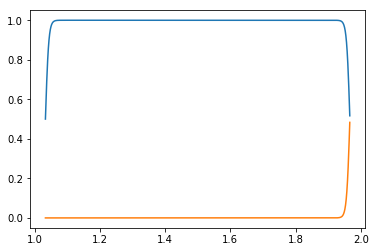

In [5]:
#SKA2 spectroscopic resolution
delta_nu = 12.8 #kHz # frequency bandwidth
nu_0 = 1420 #MHz #rest frequency of neutral hydrogen
z1 = 1.1
sigma_nu = (delta_nu*10**(3.0))/(np.sqrt(8*np.log(2)))
sigma_z = ((1+z1)**2.)*(sigma_nu/(nu_0*10**(6.0))) # spectroscopic resolution for a given redshift
# spectroscopic resolution of survey
#print (sigma_z) 

#######################################################################
# Redshift range to calculate
ZMIN=0.1; ZMAX=2.9; NBINS=4
z_edge = np.linspace(ZMIN, ZMAX, NBINS) # Bin edges
BIN_TOT = NBINS-1

z_centroid = 0.5 * (z_edge[:-1] + z_edge[1:]) # Bin centroids
dz = z_edge[1:] - z_edge[:-1] # Bin widths # CLASS uses half-width of bins as dz
z_min = z_centroid-dz/2.0
z_max = z_centroid+dz/2.0

bin1 = np.arange(z_min[0],z_max[0],0.001)
bin2= np.arange(z_min[1],z_max[1],0.001)


#print (zmin,zmax)
wA = 0.01
winamp2=zeros(size(bin2), float)
for i, z in enumerate(bin2):
#    print (i,z)
    wL = (z-z_min[1])/wA
    wS = (z_max[1]-z)/wA
    winamp2[i] = 0.25 * (1.+tanh(wS)) * (1.+tanh(wL))
    
winamp1=zeros(size(bin1), float)
for i, z in enumerate(bin1):
#    print (i,z)
    wL = (z-z_min[1])/wA
    wS = (z_max[1]-z)/wA
    winamp1[i] = 0.25 * (1.+tanh(wS)) * (1.+tanh(wL))

figure()
plot(bin2, winamp2)
plot(bin2, winamp1)
#####################################################################

In [6]:
zmin=0.1; zmax=2.9; nbin=5
z_olap=0.1
z_edge = np.linspace(zmin, zmax, nbin+1) # Bin edges
z_bin=zip(z_edge[:-1]-z_olap/2.,z_edge[1:]+z_olap/2.)
z_centroid=np.zeros(len(z_bin))
for i in range(len(z_bin)):
    z_centroid[i]=np.mean(z_bin[i])
    
def return_tanh_window(z,zmin,zmax,taper_width=0.01):
#     zmin=min(z) ; zmax=max(z)
    print zmin,zmax
    wL = (z-zmin)/taper_width
    wS = (zmax-z)/taper_width
    W= 0.25 * np.tanh(wS)* (np.tanh(wL))
    return W

In [7]:
z_step=0.0001
bin_z={} ; window={} ; dwindow={}
for i in range(nbin):
#     bin_z[i]=np.arange(z_bin[i][0],z_bin[i][1]+z_step,z_step)
    bin_z[i]=np.arange(zmin,zmax+z_step,z_step)
    window[i]=return_tanh_window(bin_z[i],z_bin[i][0],z_bin[i][1],taper_width=0.02)
    dwindow[i]=return_derivative(bin_z[i],window[i])

0.05 0.71


NameError: name 'return_derivative' is not defined

KeyError: 1

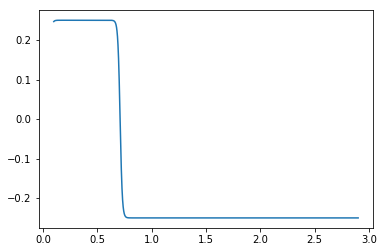

In [8]:
figure()
for i in range(nbin):
    bin
    plot(bin_z[i],window[i])
#     plot(bin_z[i],dwindow[i])

#### Window function power spectrum analysis

0.004004004004


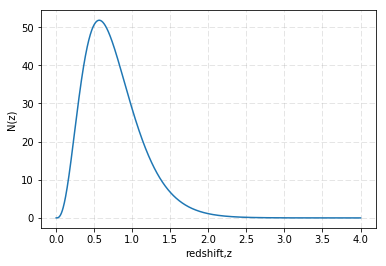

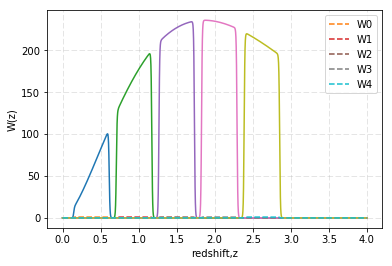

In [18]:
##################################################################################
# smooth tanh window function
def return_wz(z,zc,zw):
    wA=0.01
    zmin=(zc-zw/2.)
    zmax=(zc+zw/2.)
    W = (0.25)*((1.+tanh((z-zmin)/wA)) * (1. + tanh((zmax-z)/wA)))
    return W
def return_derivative(x,y,eps=0.01):
    f=interp1d(x,y,kind="cubic",bounds_error=False,fill_value="extrapolate")
    fprime=(f(x+eps)-f(x-eps))/(2.*eps)
    return fprime
#################################################################################
#clustering bias function, (4.2) in  1501.03990 
def bias_z0ujy(z): 
    return 0.8695*np.exp(z*0.2338)

##################################################################################

#print (smooth_th_W(1,0.5,0.1))
# def return_wz(z,zc,zw):
#     W=np.exp(-(z - zc) ** 2. / 2. / zw ** 2.) / np.sqrt(2. * np.pi) / zw
#     return W

# def return_derivative(x,y,eps=0.01):
#     f=interp1d(x,y,kind="cubic",bounds_error=False,fill_value="extrapolate")
#     fprime=(f(x+eps)-f(x-eps))/(2.*eps)
#     return fprime

###################################################################################

# zc=arange(0.5,3.0,0.7)
# zc=[1.8,2.2]
# z=np.linspace(0.0,4.,1000) ; z_eps=mean(z[1:]-z[:-1])
# print (z_eps)


#########################################################################################
# data=np.loadtxt("../../continuum_ska_survey/raw_data/sim_details/nz_ska_Smin1p0uJy_alonso-f1.dat")
# fn_Nz=interp1d(data[:,0],data[:,1],kind="cubic",bounds_error=False,fill_value="extrapolate")
# def fn_Nz(z):
#     zc = 2.5; zw=5
#     temp = 10*np.exp(-(z - zc) ** 2. / 2. / zw ** 2.) / np.sqrt(2. * np.pi) / zw
#     return temp


#############################################################################

# redshift distribution perarcmin^{2} for 0ujy
def fn_Nz(z):
    norm=1./3600.#((pi/180.)**2.)#*(3600.)
    temp = norm*pow(10,6.23)*pow(z,1.82)*np.exp(-0.98*z)
    return temp

def fn_Nz1(z):
    norm=1./3600.#((pi/180.)**2.)#*(3600.)
    temp = norm*pow(10,7.33)*pow(z,3.02)*np.exp(-5.34*z)
    return temp




figure()
#plot(z,fn_Nz(z))
plot(z,fn_Nz1(z))
xlabel("redshift,z")
ylabel("N(z)")
#semilogy()
grid(linestyle="dashed",alpha=0.4)
#savefig(figpath + "galaxy_number_density.pdf")
#############################################################################
zc=z_centroid
z=np.linspace(0.0,4.,1000) ; z_eps=mean(z[1:]-z[:-1])
print (z_eps)

Nz=fn_Nz(z)
#Nz=1
SW=[] ; W={} ; rawW={}; B={}
for i,temp_zc in enumerate(zc):
#    Wz=return_wz(z,zc=temp_zc,zw=0.03*temp_zc**0.8)
    Wz=return_wz(z,zc=temp_zc,zw=dz[0]/2.)
    bz=bias_z0ujy(temp_zc)
    rawW[i]=Wz
#    W[i]=Wz*Nz/np.sum(Wz*Nz*z_eps)
    W[i]=Wz*Nz
    B[i]=bz
    SW.append(SplinedSourceWindow(z=z,W=W[i],bias=B[i],dlog10Ndm=0.0))
    
figure()
for i,temp_zc in enumerate(zc):
    plot(z,W[i],label="")
    plot(z,rawW[i],"--",label="W" + str(i))
    
legend(loc=0)
xlabel("redshift,z")
ylabel("W(z)")
grid(linestyle="dashed",alpha=0.4)
#savefig(figpath + "window_function.pdf")

In [8]:
bz

array([ 1.04833486,  1.45429763])

In [74]:
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = SW
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
clkey=[k1 for k1 in cls.keys() if "P" not in k1]

In [75]:
cls.keys()

dict_keys(['PxP', 'PxW1', 'PxW2', 'W1xP', 'W1xW1', 'W1xW2', 'W2xP', 'W2xW1', 'W2xW2'])

In [76]:
clkey

['W1xW1', 'W1xW2', 'W2xW1', 'W2xW2']

In [77]:
#z=0.8, sigma=0.7
data1=loadtxt("/home/administrator/Documents/LSS-Doppler/raw_data/SKA2_3Nbin/ska_Smin_Nbin2_scalCovCls.dat")
norm1=data1[:,0]*(data1[:,0]+1.)/(2.*pi)
clz08=append(0,data1[:,19]/norm1) ; ell1=append(0,data1[:,0])
print (clz08[1])

1.3477432483900212e-06


(5e-09, 1e-05)

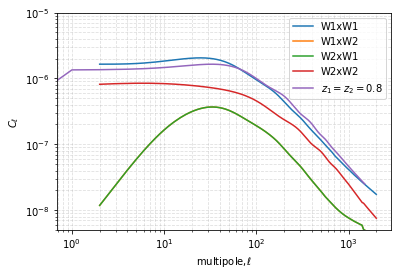

In [78]:
#Note that P is CMB lensing, as a deflection angle power (i.e. PxP is [l(l+1)]^2C_l\phi\phi/2\pi)
#lensing window functions are for kappa (and counts for the fractional angular number density)
ls=  np.arange(2, lmax+1)

plt.figure()
for spectrum in clkey:
    plt.loglog(ls, abs(cls[spectrum][2:lmax+1]*2.*pi/(ls*(ls+1))), label=spectrum)
plot(ell1,(clz08),label="$z_1 = z_2=0.8$")
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();
plt.xlabel("multipole,$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_{\ell}/2 \pi$")
plt.ylabel(r"$C_{\ell}$")
plt.grid(linestyle="dashed",which="both",alpha=0.4)
plt.ylim(5e-9,1e-5)
#savefig(figpath + "spectra.pdf")

# Window function power spectrum analysis with derivative of window function

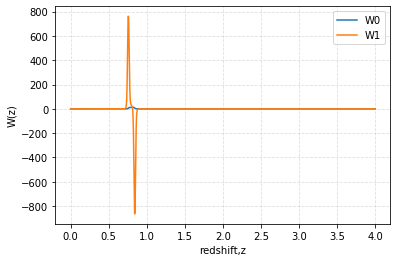

In [14]:
SW=[] ; W={} ; rawW={}
temp_zc=zc[0]
Wz=return_wz(z,zc=temp_zc,zw=0.1*temp_zc**0.8)
W[0]=Wz*Nz/np.sum(Wz*Nz*z_eps)
SW.append(SplinedSourceWindow(z=z,W=W[0]))
W[1]=return_derivative(z,W[0]) *(1.+z)
SW.append(SplinedSourceWindow(z=z,W=W[1]))    
    
figure()
for i in range(2):
    plot(z,W[i],label="W" + str(i))    
legend(loc=0)
xlabel("redshift,z")
ylabel("W(z)")
grid(linestyle="dashed",alpha=0.4)
#savefig(figpath + "window_function_and_derivative.pdf")

In [15]:
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = SW
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
clkey=[k1 for k1 in cls.keys() if "P" not in k1]

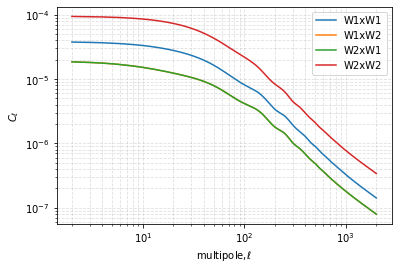

In [16]:
#Note that P is CMB lensing, as a deflection angle power (i.e. PxP is [l(l+1)]^2C_l\phi\phi/2\pi)
#lensing window functions are for kappa (and counts for the fractional angular number density)
ls=  np.arange(2, lmax+1)

plt.figure()
for spectrum in clkey:
    plt.loglog(ls, abs(cls[spectrum][2:lmax+1]*2.*pi/(ls*(ls+1))), label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();
plt.xlabel("multipole,$\ell$")
# plt.ylabel(r"$\ell(\ell+1)C_{\ell}/2 \pi$")
plt.ylabel(r"$C_{\ell}$")
plt.grid(linestyle="dashed",which="both",alpha=0.4)
#plt.ylim(5e-9,1e-5)
#savefig(figpath + "spectra_w_dw.pdf")